# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Fidya Farasalsabila
- **Email:** fidid8@gmail.com
- **ID Dicoding:** salsabilaf

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Di mana 5 negara bagian teratas dengan jumlah pesanan terbanyak?
- Pertanyaan 2: Apa metode pembayaran yang paling banyak digunakan?

## Import Semua Packages/Library yang Digunakan

In [1]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

In [3]:
!pip list

Package                            Version
---------------------------------- ------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.11
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2025.1.6.0.33.42
astunparse                         1.6.3
atpublic                           4.1.0
attrs                              24.3.0
audioread                          3.0.1
autograd             

## Data Wrangling

### Gathering Data

In [27]:
customers_df = pd.read_csv("customers_dataset.csv")
geolocation_df=pd.read_csv("geolocation_dataset.csv")
order_items_df = pd.read_csv("order_items_dataset.csv")
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_df = pd.read_csv("orders_dataset.csv")
product_category_df =  pd.read_csv("product_category_name_translation.csv")
product_df = pd.read_csv("products_dataset.csv")
seller_df = pd.read_csv("sellers_dataset.csv")

In [28]:
from IPython.display import display
display(customers_df.head())
display(geolocation_df.head())
display(order_items_df.head())
display(order_payments_df.head())
display(order_df.head())
display(product_category_df.head())
display(product_df.head())
display(seller_df.head())

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [29]:
product_df.isnull().sum()
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [30]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [31]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [32]:
customers_df.info()
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id
customer_state,
RR,46
AP,68
AC,81
AM,148
RO,253
TO,280
SE,350
AL,413
RN,485


In [33]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [34]:
order_payments_df.info()
order_payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique"
})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,order_id
payment_type,
boleto,19784
credit_card,76505
debit_card,1528
not_defined,3
voucher,3866


### Cleaning Data

In [37]:
#menghapus baris yang memiliki nilai kosong.
customers_df.dropna(axis=0, inplace=True)
geolocation_df.dropna(axis=0, inplace=True)
order_items_df.dropna(axis=0, inplace=True)
order_payments_df.dropna(axis=0, inplace=True)
order_df.dropna(axis=0, inplace=True)
product_category_df.dropna(axis=0, inplace=True)
product_df.dropna(axis=0, inplace=True)
seller_df.dropna(axis=0, inplace=True)

In [38]:
#Menghapus Baris Duplikat
customers_df.drop_duplicates(inplace=True)
geolocation_df.drop_duplicates(inplace=True)
order_items_df.drop_duplicates(inplace=True)
order_payments_df.drop_duplicates(inplace=True)
order_df.drop_duplicates(inplace=True)
product_category_df.drop_duplicates(inplace=True)
product_df.drop_duplicates(inplace=True)
seller_df.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

### Explore State & payment method

In [41]:
order_df.groupby(by="order_status").agg({
    "order_id": "nunique"
})

,order_id
order_status,
canceled,6
delivered,96455


In [42]:
order_payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique"
})

,order_id
payment_type,
boleto,19784
credit_card,76505
debit_card,1528
not_defined,3
voucher,3866


In [43]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=True)

,customer_id
customer_state,
RR,46
AP,68
AC,81
AM,148
RO,253
TO,280
SE,350
AL,413
RN,485


In [44]:
d1=pd.merge(
    left=order_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100740 entries, 0 to 100739
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       100740 non-null  object 
 1   customer_id                    100740 non-null  object 
 2   order_status                   100740 non-null  object 
 3   order_purchase_timestamp       100740 non-null  object 
 4   order_approved_at              100740 non-null  object 
 5   order_delivered_carrier_date   100740 non-null  object 
 6   order_delivered_customer_date  100740 non-null  object 
 7   order_estimated_delivery_date  100740 non-null  object 
 8   payment_sequential             100739 non-null  float64
 9   payment_type                   100739 non-null  object 
 10  payment_installments           100739 non-null  float64
 11  payment_value                  100739 non-null  float64
dtypes: float64(3), object(9)
memor

In [45]:
d2=pd.merge(
    left=order_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
d2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [46]:
bystate_df = d2.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).reset_index().head(5)
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df

,customer_state,customer_count
0,SP,40489
1,RJ,12351
2,MG,11352
3,RS,5342
4,PR,4923


In [50]:
bypayment_df = d1.groupby(by="payment_type").customer_id.nunique().reset_index()
bypayment_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [47]:
top5state=customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).head(5)

<ipython-input-48-90a35de2f533>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-48-90a35de2f533>:3: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(


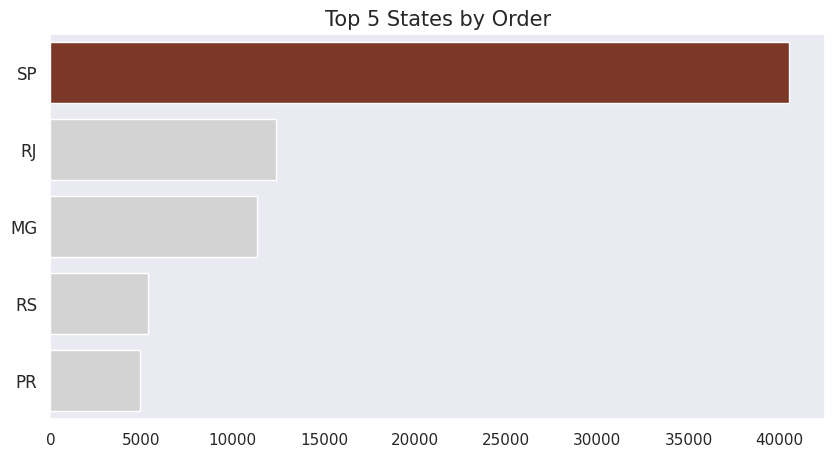

In [48]:
plt.figure(figsize=(10, 5))
colors_ = ["#8a2f19", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Top 5 States by Order", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [49]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


### Pertanyaan 2:

In [51]:
min_date = d1["order_purchase_timestamp"].min()
max_date = d1["order_purchase_timestamp"].max()

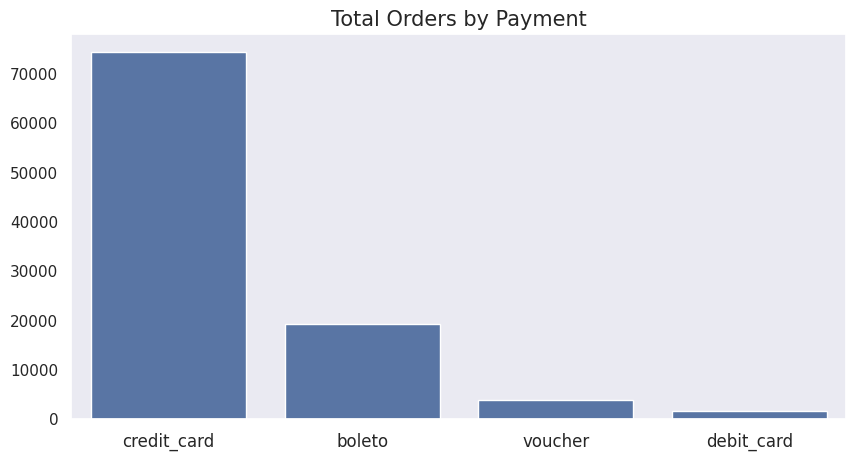

In [54]:
plt.figure(figsize=(10, 5))
colors_ = ["#8A2F19", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="customer_count",
    x="payment_type",
    data=bypayment_df.sort_values(by="customer_count", ascending=False)
)
plt.title("Total Orders by Payment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Analisis Lanjutan (Opsional)

In [55]:
d1.to_csv("d1.csv", index=False)

In [57]:
d2.to_csv("d2.csv", index=False)

## Conclusion

# **Kesimpulan Pertanyaan 1: Lima State dengan Pembelian Terbanyak**
Berdasarkan analisis yang dilakukan terhadap data transaksi penjualan, ditemukan bahwa lima state dengan pembelian terbanyak adalah São Paulo (SP), Rio de Janeiro (RJ), Minas Gerais (MG), Rio Grande do Sul (RS), dan Paraná (PR).

**Penjelasan Detail:**

1. São Paulo (SP) sebagai state dengan jumlah pembelian tertinggi, menonjol sebagai pusat ekonomi terbesar di Brasil. Dengan populasi yang besar, urbanisasi yang tinggi, dan daya beli masyarakat yang kuat, São Paulo secara alami menjadi lokasi dengan transaksi tertinggi. Selain itu, keberadaan berbagai pusat perbelanjaan, jaringan logistik yang terintegrasi, serta infrastruktur digital yang maju membuat masyarakat di SP lebih aktif dalam berbelanja secara online maupun offline.

2. Rio de Janeiro (RJ), yang berada di urutan kedua, juga menunjukkan kontribusi besar terhadap pembelian. Sebagai salah satu kota besar yang memiliki populasi signifikan serta daya tarik wisata internasional, RJ mencerminkan aktivitas ekonomi yang dinamis. Gaya hidup masyarakat perkotaan di Rio de Janeiro yang sering mengadopsi tren belanja online turut mendukung tingginya angka transaksi di state ini.

3. Minas Gerais (MG) menempati posisi ketiga dalam daftar state dengan pembelian terbanyak. Minas Gerais memiliki populasi yang besar dengan tingkat perkembangan ekonomi yang cukup stabil, terutama di sektor perdagangan. Hal ini menjadikan MG sebagai salah satu kontributor utama dalam konsumsi produk, baik kebutuhan sehari-hari maupun produk non-primer.

4. Rio Grande do Sul (RS), yang berada di posisi keempat, juga memiliki angka pembelian yang signifikan. State ini dikenal dengan basis konsumen yang loyal dan perekonomian yang cukup stabil. Banyaknya masyarakat di RS yang aktif dalam perdagangan dan konsumsi online membuatnya berada di antara lima besar.

5. Paraná (PR) menutup lima besar dengan tingkat pembelian yang tinggi. Kemajuan infrastruktur, konektivitas internet, dan kemudahan akses terhadap layanan belanja daring berperan dalam peningkatan konsumsi di Paraná. Selain itu, perkembangan e-commerce di PR juga didukung oleh pertumbuhan komunitas konsumen yang terus meningkat.

**Analisis Tambahan:**

Tren ini menunjukkan bahwa kelima state tersebut merupakan pasar yang sangat potensial bagi bisnis e-commerce, retail, dan jasa pengiriman. Distribusi transaksi yang tinggi di SP, RJ, MG, RS, dan PR juga memperlihatkan perbedaan perilaku konsumen di wilayah-wilayah yang memiliki populasi besar, infrastruktur maju, dan daya beli yang tinggi. Keberhasilan bisnis di kelima state ini dapat menjadi model atau titik fokus untuk ekspansi bisnis ke wilayah lain yang serupa.

---



# **Kesimpulan Pertanyaan 2: Metode Pembayaran Terbanyak**
Dari data yang dianalisis, ditemukan bahwa metode pembayaran yang paling sering digunakan oleh konsumen adalah kartu kredit (credit card).

**Penjelasan Detail:**

1. Popularitas Kartu Kredit: Kartu kredit menjadi pilihan utama karena kemudahannya dalam digunakan saat berbelanja, baik online maupun offline. Pengguna kartu kredit dapat melakukan pembayaran dalam hitungan detik tanpa perlu menyiapkan uang tunai atau melakukan transfer manual. Selain itu, kartu kredit juga menawarkan berbagai keuntungan tambahan seperti program cashback, poin reward, cicilan tanpa bunga, dan diskon khusus yang menarik bagi konsumen.

2. Kenyamanan dalam Transaksi Online: Dalam konteks belanja online, kartu kredit menawarkan kenyamanan dan kecepatan yang sulit disaingi oleh metode pembayaran lain. Konsumen hanya perlu memasukkan detail kartu mereka sekali dan dapat menggunakannya untuk transaksi berulang kali di platform e-commerce tanpa hambatan. Integrasi kartu kredit dengan layanan pembayaran digital seperti PayPal atau Apple Pay juga semakin memperkuat popularitas metode ini.

3. Keamanan dalam Pembayaran: Dengan perkembangan teknologi, pembayaran menggunakan kartu kredit semakin aman berkat penerapan fitur seperti verifikasi dua faktor (two-factor authentication) dan sistem enkripsi data. Hal ini meningkatkan kepercayaan konsumen dalam menggunakan kartu kredit untuk transaksi mereka, terutama dalam belanja online yang membutuhkan perlindungan data pribadi.

4. Kemudahan Cicilan: Salah satu alasan utama popularitas kartu kredit di Brasil adalah fleksibilitas cicilan yang ditawarkan. Konsumen dapat membagi pembayaran mereka menjadi beberapa kali angsuran tanpa bunga, memungkinkan mereka untuk membeli produk yang lebih mahal tanpa membebani anggaran bulanan mereka. Opsi ini sangat menarik bagi masyarakat yang ingin memaksimalkan daya beli mereka.

5. Dukungan Bank dan Penyedia Kartu Kredit: Bank dan penyedia kartu kredit secara aktif mendorong penggunaan kartu melalui promosi, penawaran eksklusif, dan kemitraan dengan platform e-commerce. Hal ini menciptakan lingkungan yang mendukung penggunaan kartu kredit sebagai metode pembayaran utama.

**Analisis Tambahan:**

Tren ini menunjukkan bahwa bisnis e-commerce perlu terus mendukung dan mengoptimalkan opsi pembayaran dengan kartu kredit untuk memberikan pengalaman berbelanja yang nyaman dan efisien kepada konsumen. Selain itu, penting bagi platform e-commerce untuk mempertimbangkan sistem keamanan pembayaran yang mutakhir guna meningkatkan kepercayaan konsumen dalam menggunakan kartu kredit.
